In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Get time
today = time.strftime("%m/%d/%Y", time.localtime())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + api_key

def getWeather(request_url):
    response = requests.get(request_url)
    if response.status_code == 200:
        city_weather = response.json()
        try:
            return [
                city_weather["name"],
                city_weather["clouds"]["all"],
                city_weather["sys"]["country"],
                city_weather["dt"],
                city_weather["main"]["humidity"],
                city_weather["coord"]["lat"],
                city_weather["coord"]["lon"],
                city_weather["main"]["temp_max"],
                city_weather["wind"]["speed"]
            ]
        except Exception as e:
            print(e)
    if response.status_code == 404:
        print(response.json()["message"])
        return None

    
citiesSample = cities
#citiesSample = citiesSample[:130]

print("Beginning Data Retrieval")
print("-----------------------------")

splitby = 50
sets = int(np.ceil(len(citiesSample)/splitby))

columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data = []

for i in np.arange(0, sets):
    ini = i * splitby
    end = (i + 1) * splitby
    for index, city in enumerate(citiesSample[ini:end]):
        print("Processing Record " + str(index+1) + " of Set " + str(i+1) + " | " + city)
        request_url = url  + "&q=" + city
        print(request_url);
        city_weather = getWeather(request_url)
        if city_weather is not None:
            city_data.append(city_weather)

city_data_pd = pd.DataFrame(city_data, columns=columns)
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4fb4c7c757006c50f0721ed961cf2338&q=saint-philippe
Processing Record 2 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4fb4c7c757006c50f0721ed961cf2338&q=taolanaro
city not found
Processing Record 3 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4fb4c7c757006c50f0721ed961cf2338&q=mataura
Processing Record 4 of Set 1 | novolabinskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4fb4c7c757006c50f0721ed961cf2338&q=novolabinskaya
Processing Record 5 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4fb4c7c757006c50f0721ed961cf2338&q=barrow
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4fb4c7c757006c50f0721ed961cf2338&q=ushuaia


In [4]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,1,CA,1535207700,66,45.36,-73.48,75.20,5.82
1,Mataura,0,NZ,1535209757,96,-46.19,168.86,36.89,7.74
2,Novolabinskaya,0,RU,1535207400,40,45.11,39.90,87.80,8.95
3,Barrow,0,AR,1535209598,66,-38.31,-60.23,51.29,10.09
4,Ushuaia,40,AR,1535205600,60,-54.81,-68.31,41.00,13.87


In [5]:
city_data_pd.to_csv(output_data_file, encoding="utf-8")
len(city_data_pd)

536

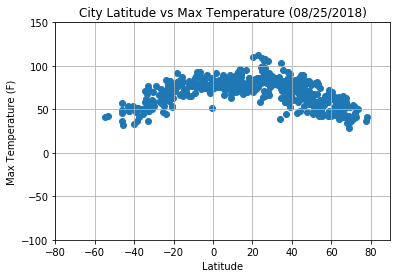

In [6]:
plt.scatter(city_data_pd["Lat"].astype(float), city_data_pd["Max Temp"].astype(float))
plt.title("City Latitude vs Max Temperature ("+today+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.axis([-80, 90, -100, 150])
plt.savefig("output_data/CityLatitude_MaxTemperature.png")
plt.show()

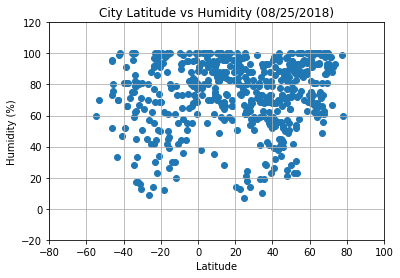

In [7]:
plt.scatter(city_data_pd["Lat"].astype(float), city_data_pd["Humidity"].astype(float))
plt.title("City Latitude vs Humidity ("+today+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.axis([-80, 100, -20, 120])
plt.savefig("output_data/CityLatitude_Humidity.png")
plt.show()

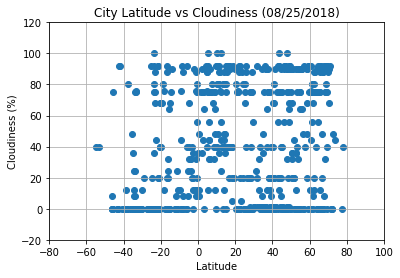

In [8]:
plt.scatter(city_data_pd["Lat"].astype(float), city_data_pd["Cloudiness"].astype(float))
plt.title("City Latitude vs Cloudiness ("+today+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.axis([-80, 100, -20, 120])
plt.savefig("output_data/CityLatitude_Cloudiness.png")
plt.show()

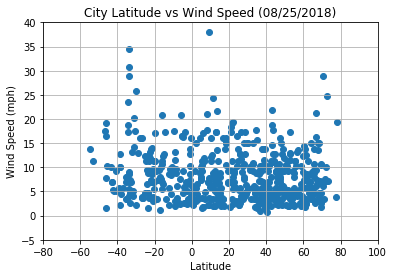

In [9]:
plt.scatter(city_data_pd["Lat"].astype(float), city_data_pd["Wind Speed"].astype(float))
plt.title("City Latitude vs Wind Speed ("+today+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.axis([-80, 100, -5, 40])
plt.savefig("output_data/CityLatitude_WindSpeed.png")
plt.show()

# Observable trends:
1. Seems like there are more cities on the North Hemisphere; most of the dots in every single plot are located in the positive side of the charts.
2. Highest temperatures are on cities located on Latitude 0 to 20.
3. This time of the year is Summer in the North and Winter in the South the temperatures in the south doesn't look as low compare with the north. I;d be insteresting to run this program for different seasons.
3. Use Imperial system help better to see data than metric System (I did run my dataset with Metric system as well).
4. We can say that the Wind Speed is between 0 to 10 MPH.
5. Cloudiness many most od the cities are 0% and 95%.
6. Most of the cities have from 60 to 100% of Humidity.